/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:308: RuntimeWarning:

invalid value encountered in sqrt



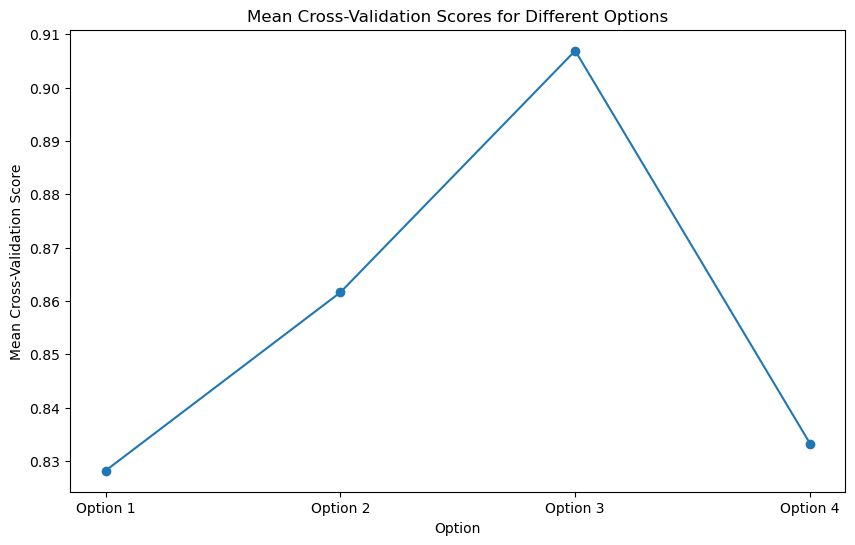

Mean cross-validation score for Option 1: 0.8281956541273819
Mean cross-validation score for Option 2: 0.8616119371042883
Mean cross-validation score for Option 3: 0.9068990988113951
Mean cross-validation score for Option 4: 0.8332846402916602


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score

# Load the dataset
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

# Define the target variable
y = housing['SalePrice']

# Drop PID and empty columns
housing.drop(columns=['PID'], inplace=True)
housing.dropna(axis=1, how='all', inplace=True)

# Option 1
selected_features1 = ['GrLivArea', 'Neighborhood', 'OverallQual']
numeric_features1 = ['GrLivArea', 'OverallQual']
categorical_features1 = ['Neighborhood']

numeric_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), 
])

categorical_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer1, numeric_features1),
        ('cat', categorical_transformer1, categorical_features1)
    ])

pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', LinearRegression())
])

X_selected1 = housing[selected_features1]
scores1 = cross_val_score(pipeline1, X_selected1, y, cv=5)
mean_score1 = scores1.mean()

# Option 2
numeric_features2 = housing.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
categorical_features2 = housing.select_dtypes(include=['object']).columns

numeric_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, numeric_features2),
        ('cat', categorical_transformer2, categorical_features2)
    ])

feature_selector = SelectKBest(score_func=f_regression, k=20)

pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('feature_selection', feature_selector),
    ('regressor', LinearRegression())
])

scores2 = cross_val_score(pipeline2, housing.drop('SalePrice', axis=1), y, cv=5)
mean_score2 = scores2.mean()

# Option 3
preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, numeric_features2),
        ('cat', categorical_transformer2, categorical_features2)
    ])

pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor3),
    ('regressor', LinearRegression())
])

scores3 = cross_val_score(pipeline3, housing.drop('SalePrice', axis=1), y, cv=5)
mean_score3 = scores3.mean()

# Option 4
selected_features4 = ["GrLivArea", "Neighborhood", "HouseStyle", "YearBuilt", "KitchenQual", "BsmtQual", "YearRemodAdd", "CentralAir"]
numeric_features4 = ["GrLivArea", "YearBuilt", "YearRemodAdd"]
categorical_features4 = ["Neighborhood", "HouseStyle", "KitchenQual", "BsmtQual", "CentralAir"]

numeric_transformer4 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer4 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor4 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer4, numeric_features4),
        ('cat', categorical_transformer4, categorical_features4)
    ])

pipeline4 = Pipeline(steps=[
    ('preprocessor', preprocessor4),
    ('regressor', LinearRegression())
])

X_selected4 = housing[selected_features4]
scores4 = cross_val_score(pipeline4, X_selected4, y, cv=5)
mean_score4 = scores4.mean()

# Visualization
options = ['Option 1', 'Option 2', 'Option 3', 'Option 4']
mean_scores = [mean_score1, mean_score2, mean_score3, mean_score4]

plt.figure(figsize=(10, 6))
plt.plot(options, mean_scores, marker='o')
plt.title('Mean Cross-Validation Scores for Different Options')
plt.xlabel('Option')
plt.ylabel('Mean Cross-Validation Score')
plt.show()

print("Mean cross-validation score for Option 1:", mean_score1)
print("Mean cross-validation score for Option 2:", mean_score2)
print("Mean cross-validation score for Option 3:", mean_score3)
print("Mean cross-validation score for Option 4:", mean_score4)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:308: RuntimeWarning:

invalid value encountered in sqrt



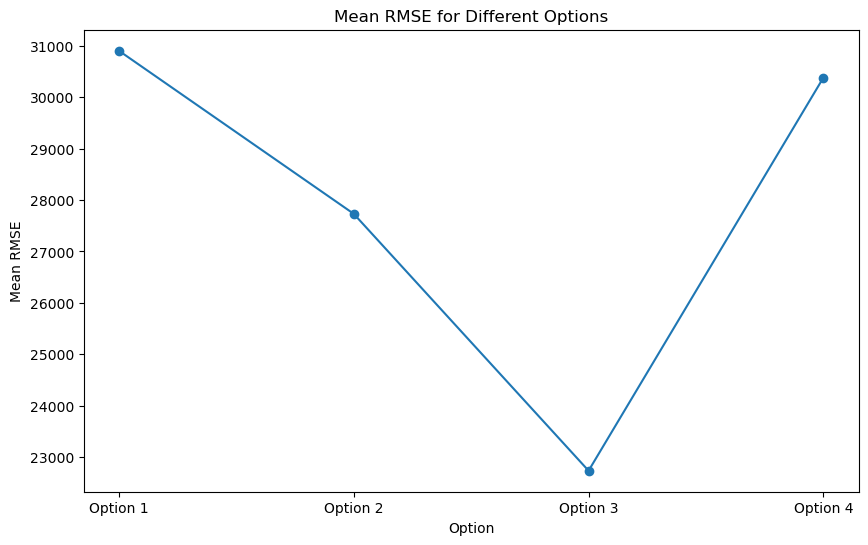

Mean RMSE for Option 1: 30908.274397699075
Mean RMSE for Option 2: 27733.184917758917
Mean RMSE for Option 3: 22731.411838112643
Mean RMSE for Option 4: 30385.191110828997


In [21]:

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error


# Option 1
selected_features1 = ['GrLivArea', 'Neighborhood', 'OverallQual']
numeric_features1 = ['GrLivArea', 'OverallQual']
categorical_features1 = ['Neighborhood']

numeric_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), 
])

categorical_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer1, numeric_features1),
        ('cat', categorical_transformer1, categorical_features1)
    ])

pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', LinearRegression())
])

X_selected1 = housing[selected_features1]
scores1 = cross_val_score(pipeline1, X_selected1, y, cv=5, scoring='neg_root_mean_squared_error')
mean_score1 = -scores1.mean()

# Option 2
numeric_features2 = housing.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
categorical_features2 = housing.select_dtypes(include=['object']).columns

numeric_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, numeric_features2),
        ('cat', categorical_transformer2, categorical_features2)
    ])

feature_selector = SelectKBest(score_func=f_regression, k=20)

pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('feature_selection', feature_selector),
    ('regressor', LinearRegression())
])

scores2 = cross_val_score(pipeline2, housing.drop('SalePrice', axis=1), y, cv=5, scoring='neg_root_mean_squared_error')
mean_score2 = -scores2.mean()

# Option 3
preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, numeric_features2),
        ('cat', categorical_transformer2, categorical_features2)
    ])

pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor3),
    ('regressor', LinearRegression())
])

scores3 = cross_val_score(pipeline3, housing.drop('SalePrice', axis=1), y, cv=5, scoring='neg_root_mean_squared_error')
mean_score3 = -scores3.mean()

# Option 4
selected_features4 = ["GrLivArea", "Neighborhood", "HouseStyle", "YearBuilt", "KitchenQual", "BsmtQual", "YearRemodAdd", "CentralAir"]
numeric_features4 = ["GrLivArea", "YearBuilt", "YearRemodAdd"]
categorical_features4 = ["Neighborhood", "HouseStyle", "KitchenQual", "BsmtQual", "CentralAir"]

numeric_transformer4 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer4 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor4 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer4, numeric_features4),
        ('cat', categorical_transformer4, categorical_features4)
    ])

pipeline4 = Pipeline(steps=[
    ('preprocessor', preprocessor4),
    ('regressor', LinearRegression())
])

X_selected4 = housing[selected_features4]
scores4 = cross_val_score(pipeline4, X_selected4, y, cv=5, scoring='neg_root_mean_squared_error')
mean_score4 = -scores4.mean()

# Visualization
options = ['Option 1', 'Option 2', 'Option 3', 'Option 4']
mean_scores = [mean_score1, mean_score2, mean_score3, mean_score4]

plt.figure(figsize=(10, 6))
plt.plot(options, mean_scores, marker='o')
plt.title('Mean RMSE for Different Options')
plt.xlabel('Option')
plt.ylabel('Mean RMSE')
plt.show()

print("Mean RMSE for Option 1:", mean_score1)
print("Mean RMSE for Option 2:", mean_score2)
print("Mean RMSE for Option 3:", mean_score3)
print("Mean RMSE for Option 4:", mean_score4)


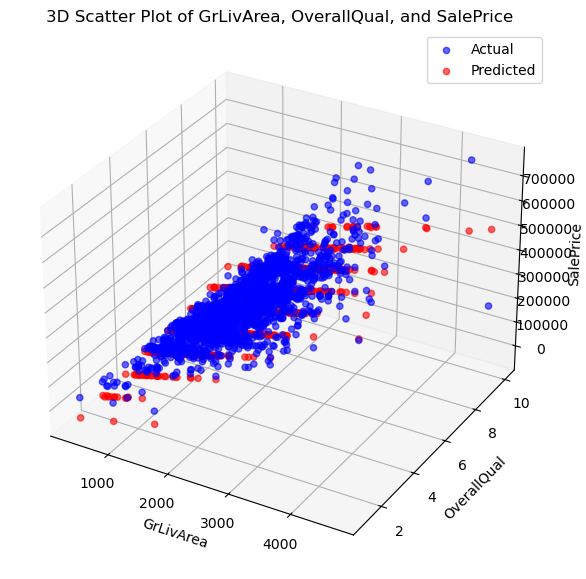

In [31]:
from mpl_toolkits.mplot3d import Axes3D

selected_features = ['GrLivArea', 'OverallQual']
y = housing['SalePrice']

# Define the pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the data
pipeline.fit(housing[selected_features], y)

# Predictions for the entire dataset
y_pred = cross_val_predict(pipeline, housing[selected_features], y, cv=5)

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(housing['GrLivArea'], housing['OverallQual'], y, label='Actual',color='blue', alpha=0.6)
ax.scatter(housing['GrLivArea'], housing['OverallQual'], y_pred, color='red', label='Predicted', alpha=0.6)
ax.set_xlabel('GrLivArea')
ax.set_ylabel('OverallQual')
ax.set_zlabel('SalePrice')
plt.title('3D Scatter Plot of GrLivArea, OverallQual, and SalePrice')
plt.legend()
plt.show()



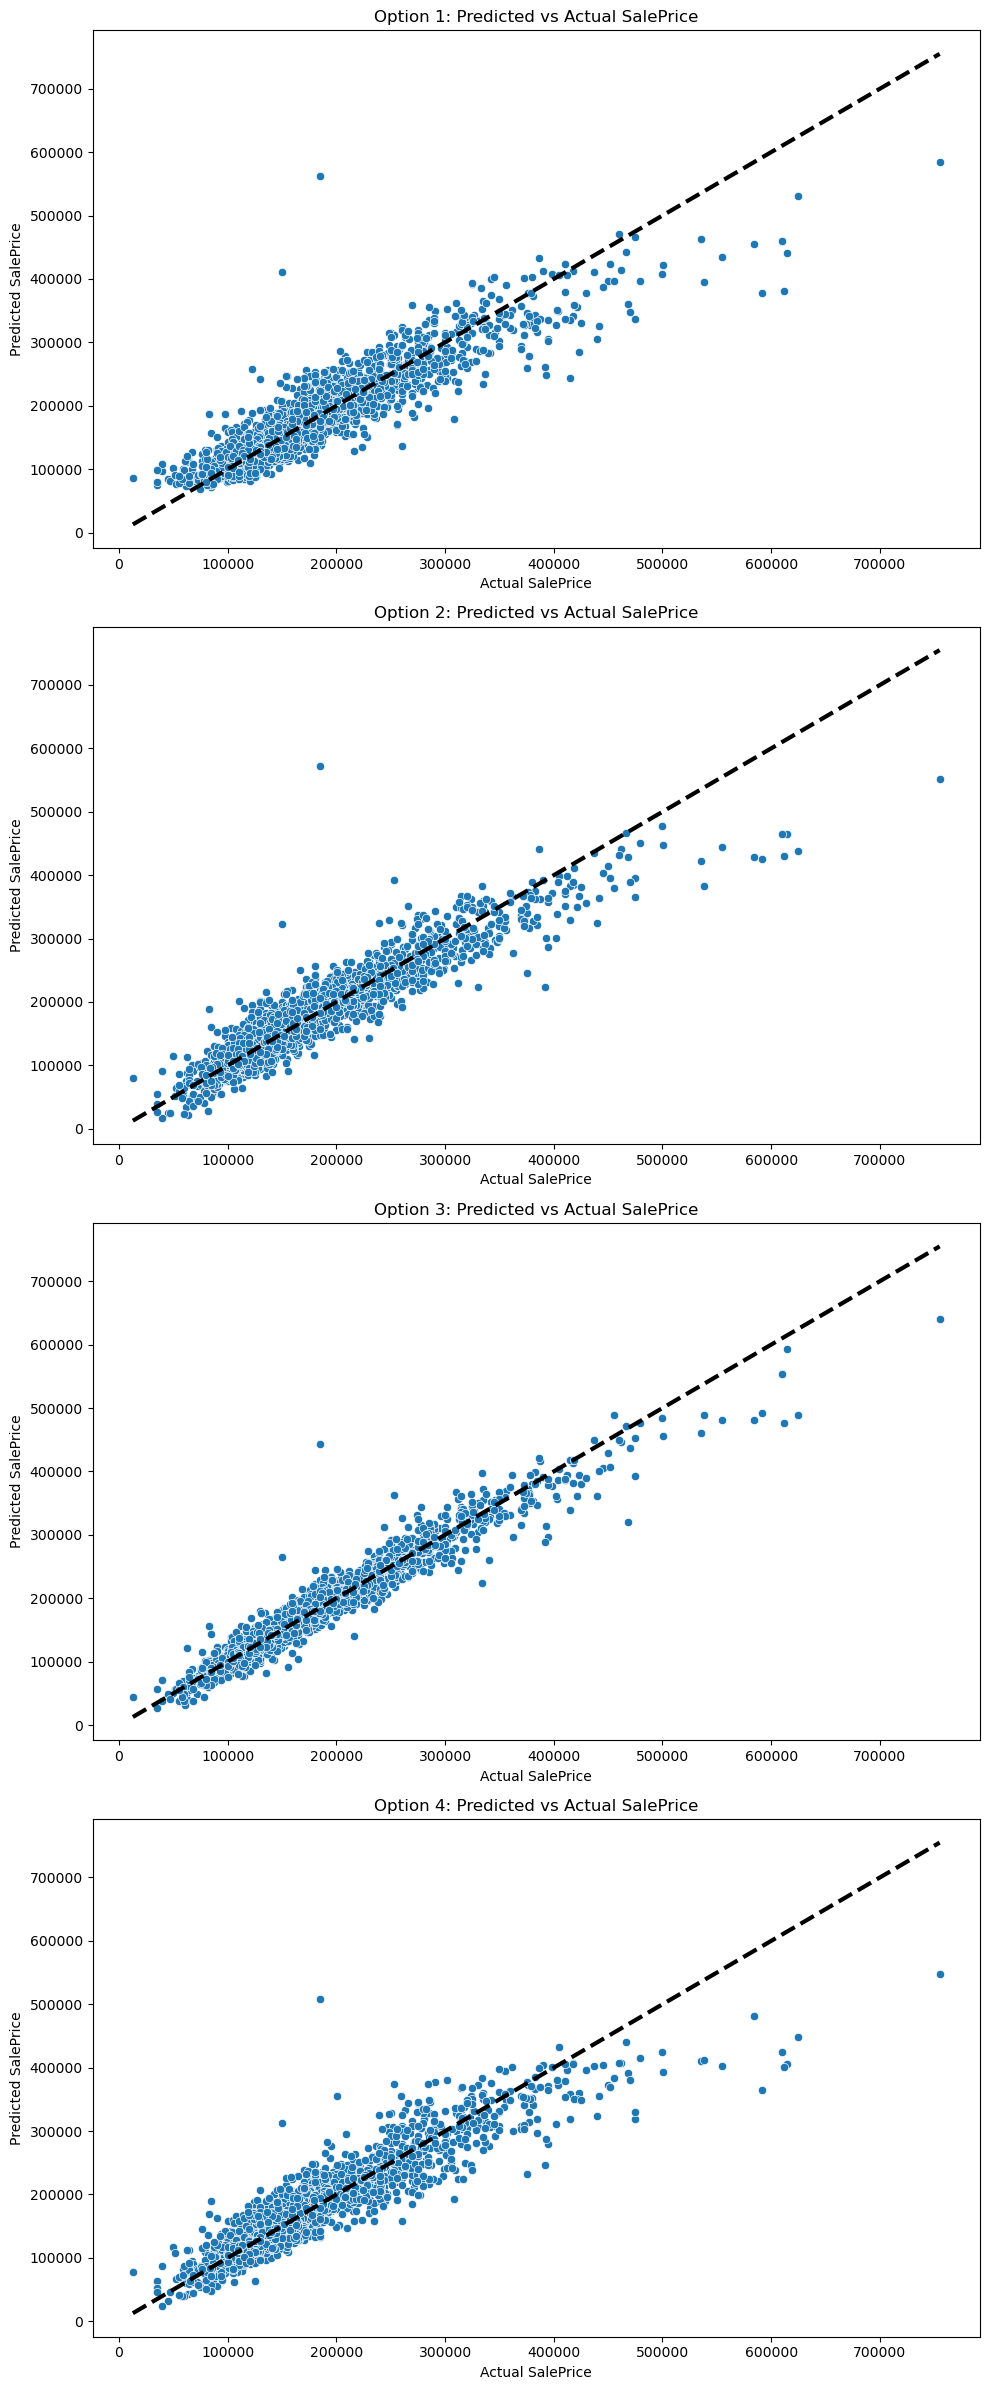

In [70]:
# Predicted vs Actual Plot for each option
fig, axes = plt.subplots(4, 1, figsize=(10, 24))

# Option 1: Predicted vs Actual
pipeline1.fit(X_selected1, y)
y_pred1 = pipeline1.predict(X_selected1)
sns.scatterplot(ax=axes[0], x=y, y=y_pred1)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
axes[0].set_title('Option 1: Predicted vs Actual SalePrice')
axes[0].set_xlabel('Actual SalePrice')
axes[0].set_ylabel('Predicted SalePrice')

# Option 2: Predicted vs Actual
pipeline2.fit(housing.drop('SalePrice', axis=1), y)
y_pred2 = pipeline2.predict(housing.drop('SalePrice', axis=1))
sns.scatterplot(ax=axes[1], x=y, y=y_pred2)
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
axes[1].set_title('Option 2: Predicted vs Actual SalePrice')
axes[1].set_xlabel('Actual SalePrice')
axes[1].set_ylabel('Predicted SalePrice')

# Option 3: Predicted vs Actual
pipeline3.fit(housing.drop('SalePrice', axis=1), y)
y_pred3 = pipeline3.predict(housing.drop('SalePrice', axis=1))
sns.scatterplot(ax=axes[2], x=y, y=y_pred3)
axes[2].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
axes[2].set_title('Option 3: Predicted vs Actual SalePrice')
axes[2].set_xlabel('Actual SalePrice')
axes[2].set_ylabel('Predicted SalePrice')

# Option 4: Predicted vs Actual
pipeline4.fit(X_selected4, y)
y_pred4 = pipeline4.predict(X_selected4)
sns.scatterplot(ax=axes[3], x=y, y=y_pred4)
axes[3].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
axes[3].set_title('Option 4: Predicted vs Actual SalePrice')
axes[3].set_xlabel('Actual SalePrice')
axes[3].set_ylabel('Predicted SalePrice')

plt.tight_layout()
plt.show()


In [7]:
import plotly.graph_objs as go

from sklearn.model_selection import cross_val_predict

# Assuming you have the `housing` DataFrame and `pipeline` already defined

# Fit the pipeline to the data
pipeline1.fit(housing[selected_features1], y)

# Predictions for the entire dataset
y_pred = cross_val_predict(pipeline1, housing[selected_features1], y, cv=5)

# Create a DataFrame for plotting
df = pd.DataFrame({
    'GrLivArea': housing['GrLivArea'],
    'OverallQual': housing['OverallQual'],
    'SalePrice': y,
    'PredictedSalePrice': y_pred
})

# Create the actual scatter plot
trace_actual = go.Scatter3d(
    x=df['GrLivArea'],
    y=df['OverallQual'],
    z=df['SalePrice'],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    ),
    name='Actual'
)

# Create the predicted scatter plot
trace_predicted = go.Scatter3d(
    x=df['GrLivArea'],
    y=df['OverallQual'],
    z=df['PredictedSalePrice'],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        opacity=0.5
    ),
    name='Predicted'
)

# Combine the two scatter plots
data = [trace_actual, trace_predicted]

# Define the layout
layout = go.Layout(
    title='3D Scatter Plot of GrLivArea, OverallQual, and SalePrice',
    scene=dict(
        xaxis_title='GrLivArea',
        yaxis_title='OverallQual',
        zaxis_title='SalePrice'
    ),
    legend=dict(x=0, y=1)
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Add animation
frames = [go.Frame(layout=dict(scene=dict(camera=dict(eye=dict(x=1.25, y=1.25, z=1.25 + i * 0.01))))) for i in range(100)]
fig.frames = frames

# Define animation settings
animation_settings = dict(
    frame=dict(duration=50, redraw=True),
    fromcurrent=True,
    transition=dict(duration=0)
)

# Update layout with animation settings
fig.update_layout(updatemenus=[dict(type='buttons',
                                    showactive=False,
                                    buttons=[dict(label='Play',
                                                  method='animate',
                                                  args=[None, animation_settings])])])

# Save the plot as an HTML file
fig.write_html("interactive_plot.html")

